In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


###################### Preprocessing #########################
from sklearn.model_selection import train_test_split, KFold, cross_validate, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, PowerTransformer
from sklearn.impute import KNNImputer


####################### Models ###########################
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


###################### Feature Reduction ########################
from sklearn.feature_selection import RFECV, SequentialFeatureSelector
from sklearn.feature_selection import RFE

###################### Metrics #######################
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, \
                  classification_report, accuracy_score,  precision_score, recall_score, f1_score, fbeta_score, make_scorer


In [ ]:
merged_file = "merge_data.data"
df = pd.read_csv(merged_file, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,0,0,40,1,1,0,0,-9,2,140,...,-9,-9,1,1,1,1,1,-9.0,-9.0,name
1,1,0,49,0,1,0,0,-9,3,160,...,-9,-9,1,1,1,1,1,-9.0,-9.0,name
2,2,0,37,1,1,0,0,-9,2,130,...,-9,-9,1,1,1,1,1,-9.0,-9.0,name
3,3,0,48,0,1,1,1,-9,4,138,...,2,-9,1,1,1,1,1,-9.0,-9.0,name
4,4,0,54,1,1,0,1,-9,3,150,...,1,-9,1,1,1,1,1,-9.0,-9.0,name


# Data preprocessing

## Assignació de categories

In [ ]:
categoriques = ['3','4','5','6','8','10','12','15','16','17','18']+[str(i) for i in range(22,27)] + ['37','38','40','50'] + [str(i) for i in range(57,68)]
for c in categoriques:
    df[int(c)]=df[int(c)].astype('category')

In [ ]:
feat_names = ["id",
 "ccf",
 "age",
 "sex",
 "painloc",
 "painexer",
 "relrest",
 "pncaden",
 "cp",
 "trestbps",
 "htn",
 "chol",
 "smoke",
 "cigs",
 "years",
 "fbs",
 "dm",
 "famhist",
 "restecg",
 "ekgmo",
 "ekgday",
 "ekgyr",
 "dig",
 "prop",
 "nitr",
 "pro",
 "diuretic",
 "proto",
 "thaldur",
 "thaltime",
 "met",
 "thalach",
 "thalrest",
 "tpeakbps",
 "tpeakbpd",
 "dummy",
 "trestbpd",
 "exang",
 "xhypo",
 "oldpeak",
 "slope",
 "rldv5",
 "rldv5e",
 "ca",
 "restckm",
 "exerckm",
 "restef",
 "restwm",
 "exeref",
 "exerwm",
 "thal",
 "thalsev",
 "thalpul",
 "earlobe",
 "cmo",
 "cday",
 "cyr",
 "num",
 "lmt",
 "ladprox",
 "laddist",
 "diag",
 "cxmain",
 "ramus",
 "om1",
 "om2",
 "rcaprox",
 "rcadist",
 "lvx1",
 "lvx2",
 "lvx3",
 "lvx4",
 "lvf",
 "cathef",
 "junk",
 "name"
]

dict_names = {i: feat_names[i] for i in range(len(feat_names))}

In [ ]:
df.rename(columns=dict_names, inplace=True)
df.columns

Index(['id', 'ccf', 'age', 'sex', 'painloc', 'painexer', 'relrest', 'pncaden',
       'cp', 'trestbps', 'htn', 'chol', 'smoke', 'cigs', 'years', 'fbs', 'dm',
       'famhist', 'restecg', 'ekgmo', 'ekgday', 'ekgyr', 'dig', 'prop', 'nitr',
       'pro', 'diuretic', 'proto', 'thaldur', 'thaltime', 'met', 'thalach',
       'thalrest', 'tpeakbps', 'tpeakbpd', 'dummy', 'trestbpd', 'exang',
       'xhypo', 'oldpeak', 'slope', 'rldv5', 'rldv5e', 'ca', 'restckm',
       'exerckm', 'restef', 'restwm', 'exeref', 'exerwm', 'thal', 'thalsev',
       'thalpul', 'earlobe', 'cmo', 'cday', 'cyr', 'num', 'lmt', 'ladprox',
       'laddist', 'diag', 'cxmain', 'ramus', 'om1', 'om2', 'rcaprox',
       'rcadist', 'lvx1', 'lvx2', 'lvx3', 'lvx4', 'lvf', 'cathef', 'junk',
       'name'],
      dtype='object')

## Variables indicades com a irrellevants

In [ ]:
len(df.loc[df["pro"] == 1])

116

Eliminem les columnes indicades com a "not used", "irrelevant", dates de proves o que són l'agregació d'altres variables.

In [ ]:
print("Nombre de features abans:", len(df.columns))
useless_columns = ["id", "ccf", "dummy", "thalsev","thalpul", "earlobe", "lvx1", "lvx2", "lvx3", "lvx4", "lvf", "cathef", "junk", "xhypo", "name", "restckm", "exerckm", "proto", "cmo", "cday", "cyr", "ekgmo", "ekgday", "ekgyr"]
df.drop(useless_columns, axis = 1, inplace = True)

print("Nombre de features després:", len(df.columns))

Nombre de features abans: 76
Nombre de features després: 52


Proto és una categoria però està marcada com a float. No són consistents els valors. Convindria eliminar.

A xhypo no s'indica què representa.

- Pro és una variable que per si mateixa no hauria de ser un indicador de malaltia o no. La presència de pro vol dir que s'ha administrat una medicació que alleuja la càrrega del cor, de manera que els valors en altres proves sortiran inferiors als valors reals. Aquesta relació no la capturen la majoria de models plantejats (potser el random forest sí), i com que s'administra a malalts el model pot esbiaixar-se, de manera que pro = 1 ho indiqui com a malalt. Tot i així, quan fitegem el random forest no és de les variables més determinants. L'approach més adient seria fer feature engineering i modificar els valors relacionats amb l'electrocardiograma en cas de pro = 1. Tanmateix, ens falta informació sobre com s'haurien de modificar aquests valors.

In [ ]:
df.drop("pro", axis = 1, inplace = True)

## Missing values

Tots els -9 són missing values

In [ ]:
df.replace(-9, np.nan, inplace=True)
df.head()

,age,sex,painloc,painexer,relrest,pncaden,cp,trestbps,htn,chol,...,lmt,ladprox,laddist,diag,cxmain,ramus,om1,om2,rcaprox,rcadist
0,40,1,1,0,0,NaN,2,140.0,0,289.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,49,0,1,0,0,NaN,3,160.0,1,180.0,...,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,37,1,1,0,0,NaN,2,130.0,0,283.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,48,0,1,1,1,NaN,4,138.0,0,214.0,...,NaN,2,NaN,NaN,2,NaN,NaN,NaN,2,NaN
4,54,1,1,0,1,NaN,3,150.0,0,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,1,NaN


Explorant les dades, hem vist que alguns missing values estaven indicats amb 0 (ex: no té sentit un colesterol de 0)

In [ ]:
df["chol"].replace(0, np.nan, inplace=True)
df["slope"].replace(0, np.nan, inplace=True)
df["trestbps"].replace(0, np.nan, inplace=True)
df["trestbpd"].replace(0, np.nan, inplace=True)

Eliminem les columnes categòriques amb més de 10% de missing values o les numèriques amb més de 30% de missing values

In [ ]:
print("Nombre de features abans:", len(df.columns))
too_nan = [c for c in df.columns if df[c].isna().sum()/len(df) > 0.1 and df[c].dtype == "category" or df[c].isna().sum()/len(df) > 0.30]
df.drop(too_nan, axis = 1, inplace = True)
print("Nombre de features després:", len(df.columns))

Nombre de features abans: 51
Nombre de features després: 21


In [ ]:
len(df)

617

## Feature engineering

Com que tenim poques dades en general i encara menys per les categories 4, i 3, i tenint en compte que 0 vol dir no tenir malaltia cardiovascular i la resta son graus de malaltia cardiovascular que no s'especifiquen, nosaltres considerarem únicament 0 o 1 (absència o presència)

In [ ]:
print(df['num'].value_counts())
df['num'].replace([3,2,4], 1, inplace = True)
print(df['num'].value_counts())

num
0    247
1    141
3    100
2     99
4     30
Name: count, dtype: int64
num
1    370
0    247
Name: count, dtype: int64


42 rldv5: height at rest
43 rldv5e: height at peak exercise

El que ens interessa és la diferència. Ens crearem una nova feature que sigui la diferència entre les dues.

In [ ]:
try:
  df['diff_rldv5'] = df['rldv5e'] - df['rldv5']
  df.drop("rldv5e", axis = 1, inplace = True)
  len(df.columns)

except:
  print("tenien massa nans")

## Tractament d'outliers

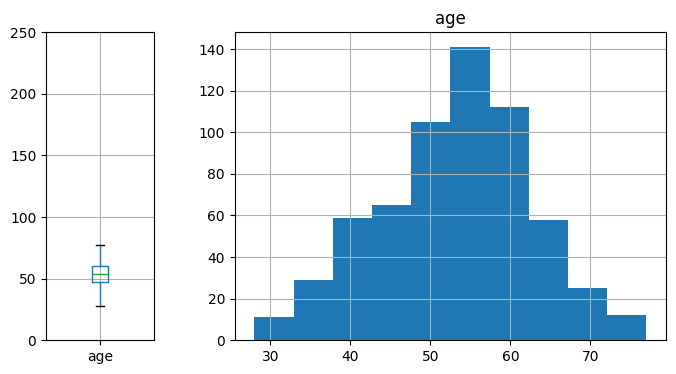

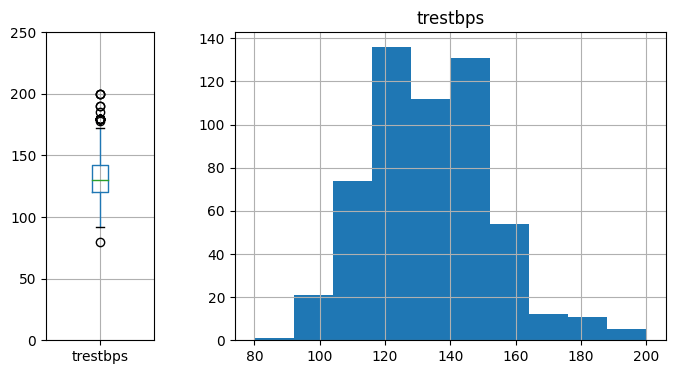

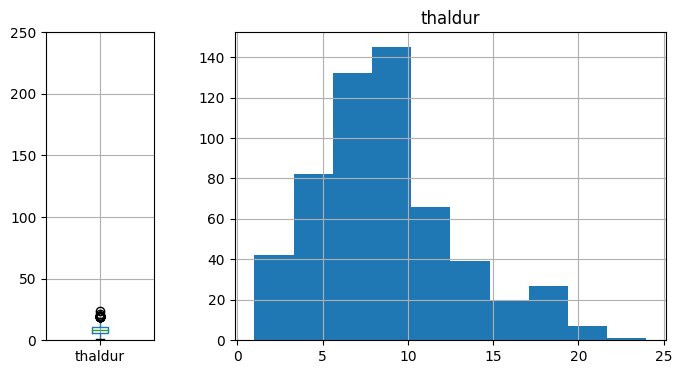

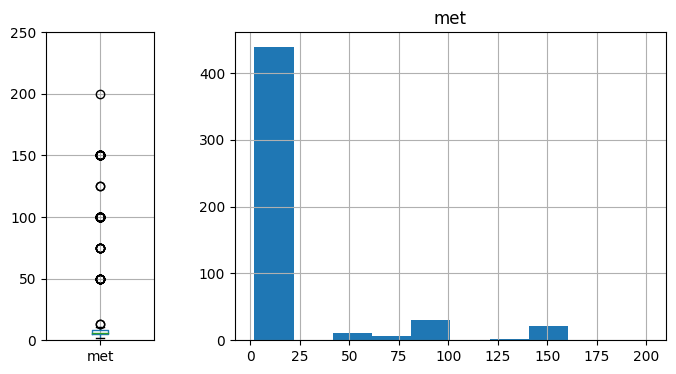

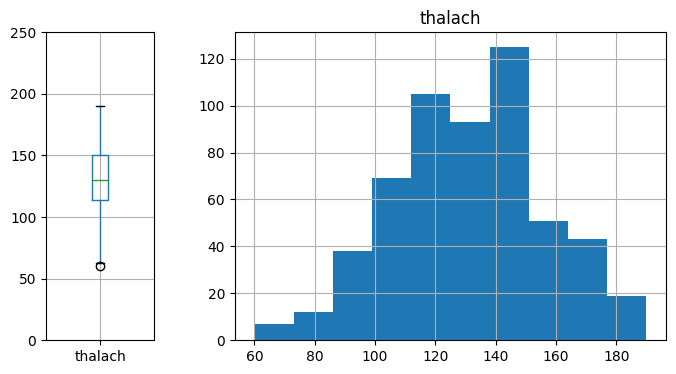

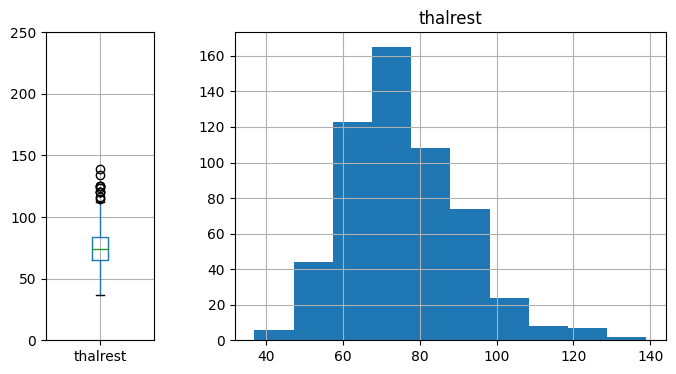

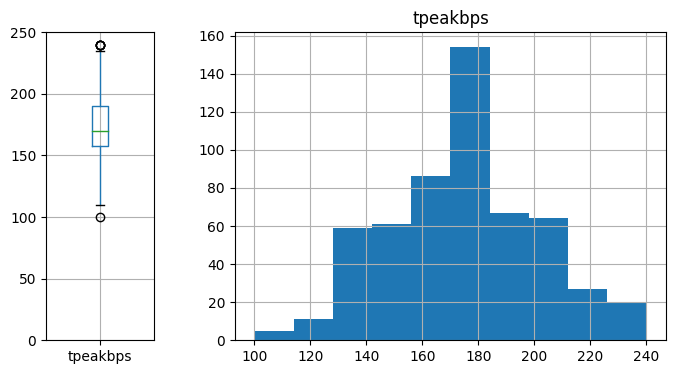

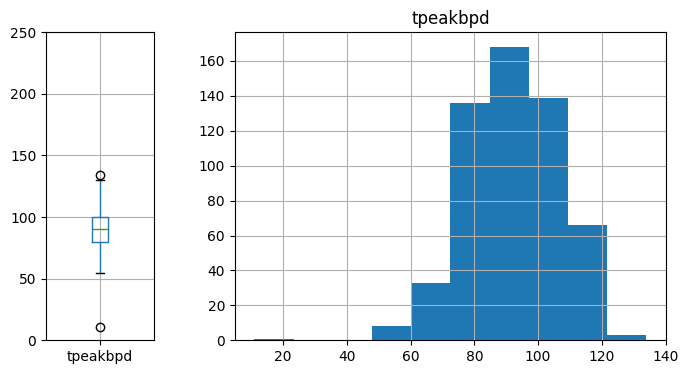

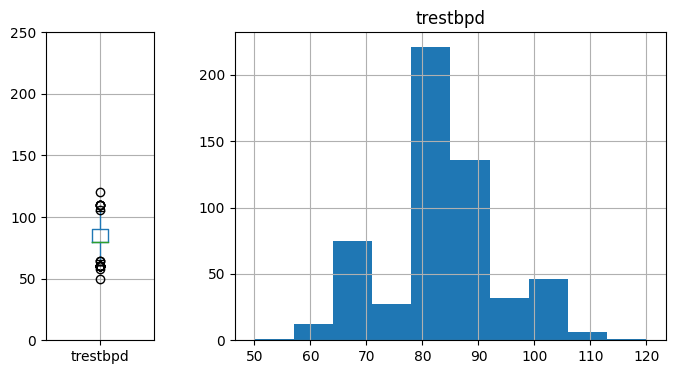

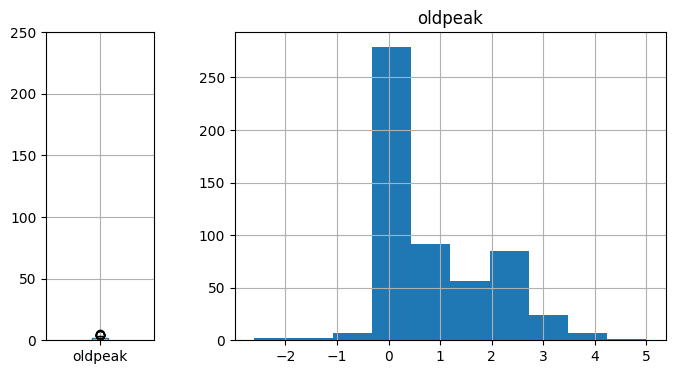

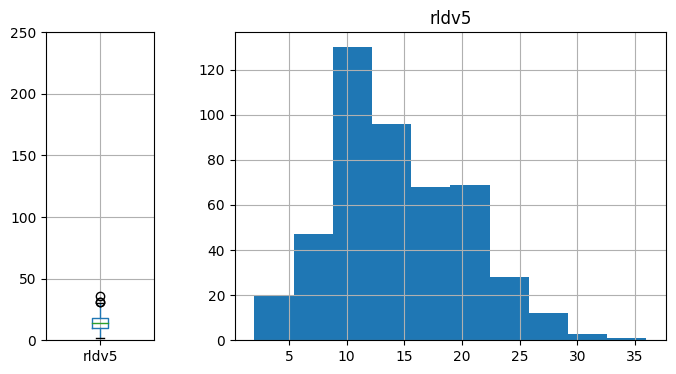

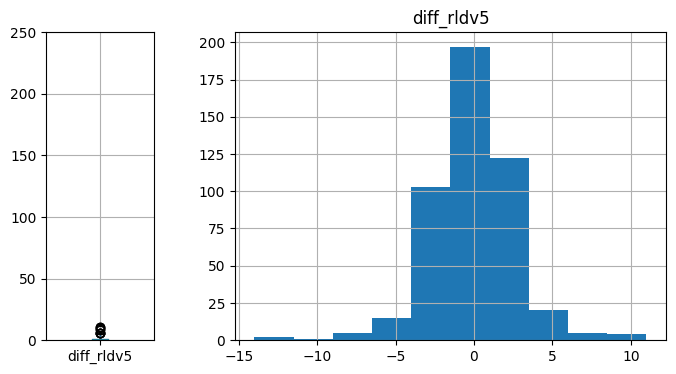

In [ ]:
for col in df.columns:
  if df[col].dtype != "category":
    fig, axes= plt.subplots(1,2, gridspec_kw={'width_ratios': [1, 4]}, figsize=(8,4))
    df.boxplot(column=col,ax=axes[0]);
    df.hist(column=col, ax=axes[1]);
    axes[0].set_ylim((0, 250))

- tpeakbddp deu tenir un error
- met té valors massa alts.


In [ ]:
print("%Outliers a met:", len(df.loc[df["met"] > 25])/len(df), "%")
print("Outliers a tpeakbpd:", len(df.loc[df["tpeakbpd"] < 20]))

%Outliers a met: 0.11831442463533225 %
Outliers a tpeakbpd: 1


Amb met és més d'un 10%, així que el posem com a NaN. En canvi, tpeakbpdd és només 1 instància, així que l'eliminem.

In [ ]:
df = df[df["tpeakbpd"] != 11]
df.loc[df["met"] > 25, "met"] = np.nan

## Anàlisi exploratòria

In [ ]:
len(df.columns)

21

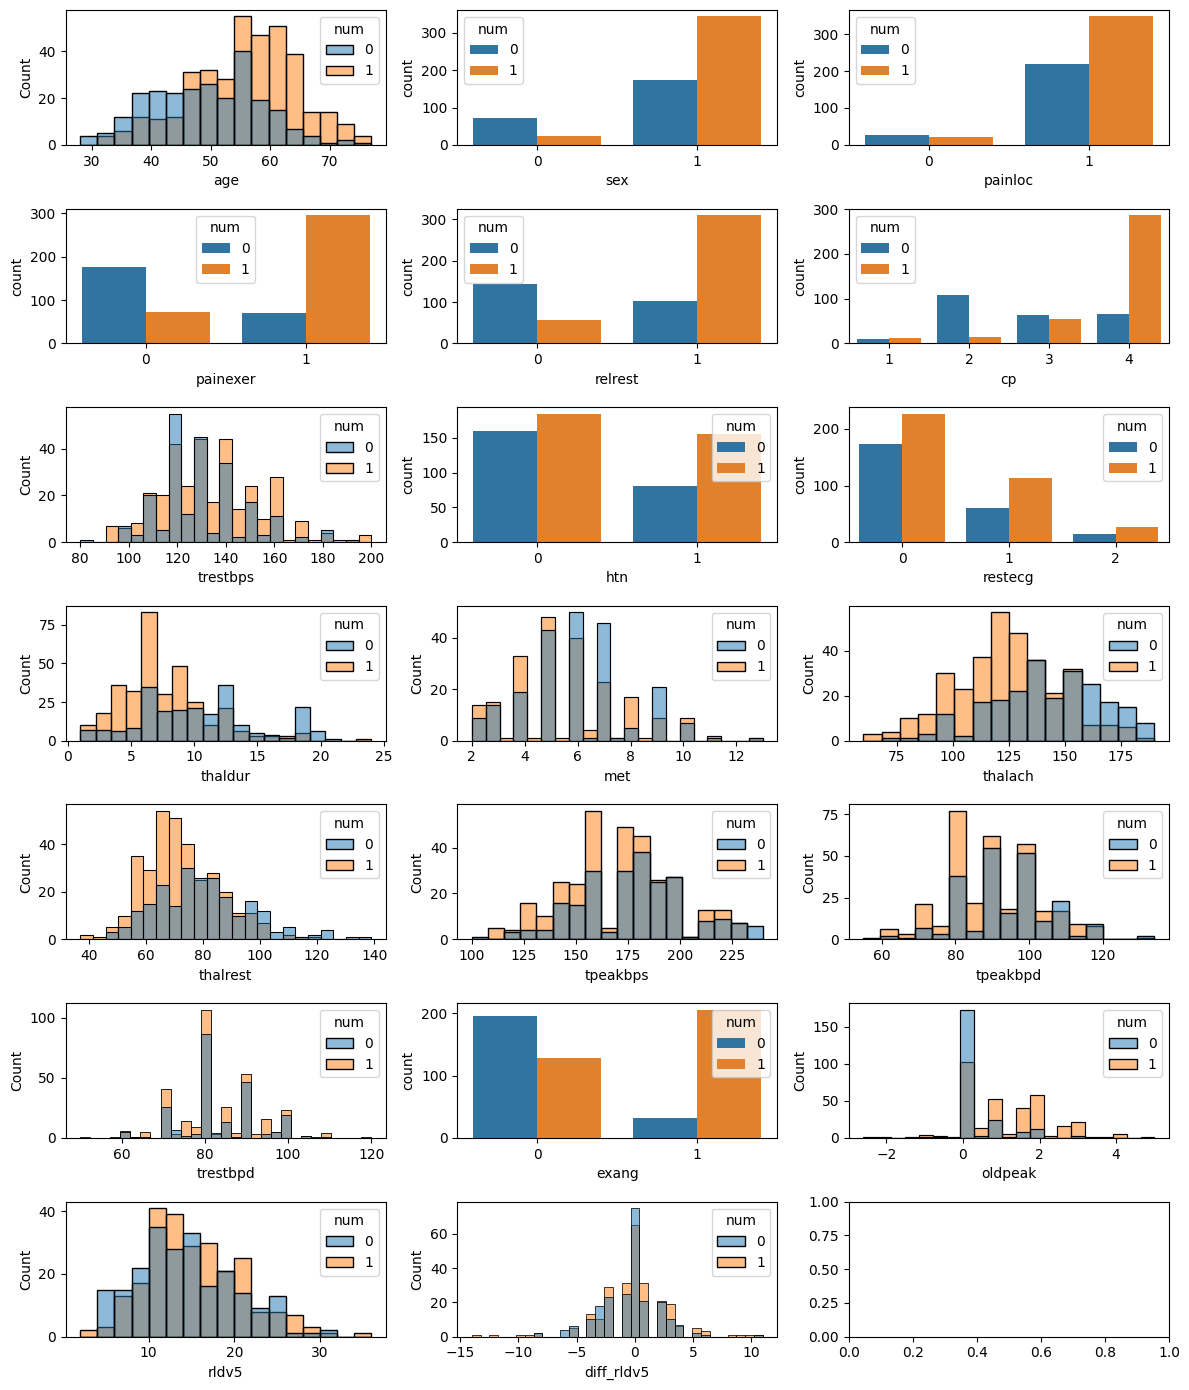

In [ ]:
fig, axes = plt.subplots(7,3,figsize=(12,14));


for i, c in enumerate([col for col in df.columns if col != "num"]):
    if c == "num":
      continue
    ax = axes.reshape(-1)[i]
    if c in df.select_dtypes(include=['category']).columns:
        a = sns.countplot(x=c,data=df, ax=ax, hue='num');
    else:
        sns.histplot(x=c,data=df, hue='num',ax=ax);
plt.tight_layout();

## Variables correlades

In [ ]:
sns.pairplot(data=df, hue='num');

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x788c6122ba30> (for post_execute):


KeyboardInterrupt: 

In [ ]:
df['num']=pd.to_numeric(df['num'])

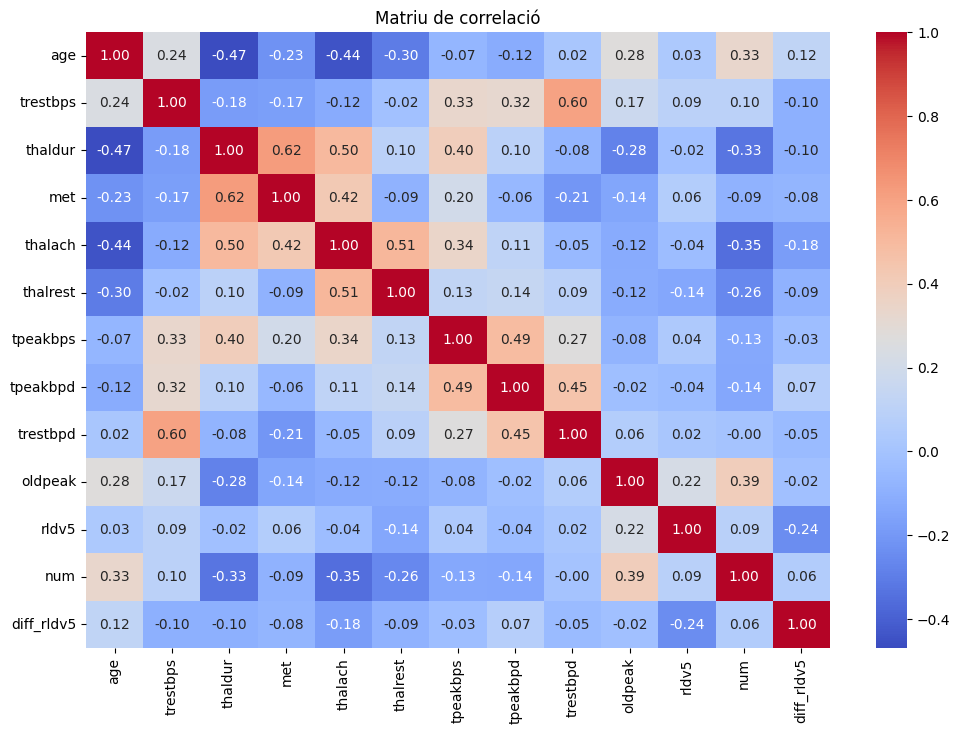

In [ ]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

correlation_matrix = df[num_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriu de correlació')
plt.show()

In [ ]:
df['num'] = df['num'].astype('category')

## Tractament de variables categòriques

In [ ]:
len(df)

616

In [ ]:
# percentatge de NaNs

cat_cols = df.select_dtypes(include=['category']).columns

missing_cats = []
for c in cat_cols:
    count = df[c].isna().sum()
    if count > 0:
      missing_cats.append(c)
      print(c, df[c].dtype, count, str(count/len(df)*100) + "%")

relrest category 4 0.6493506493506493%
htn category 34 5.51948051948052%
restecg category 2 0.3246753246753247%
exang category 55 8.928571428571429%


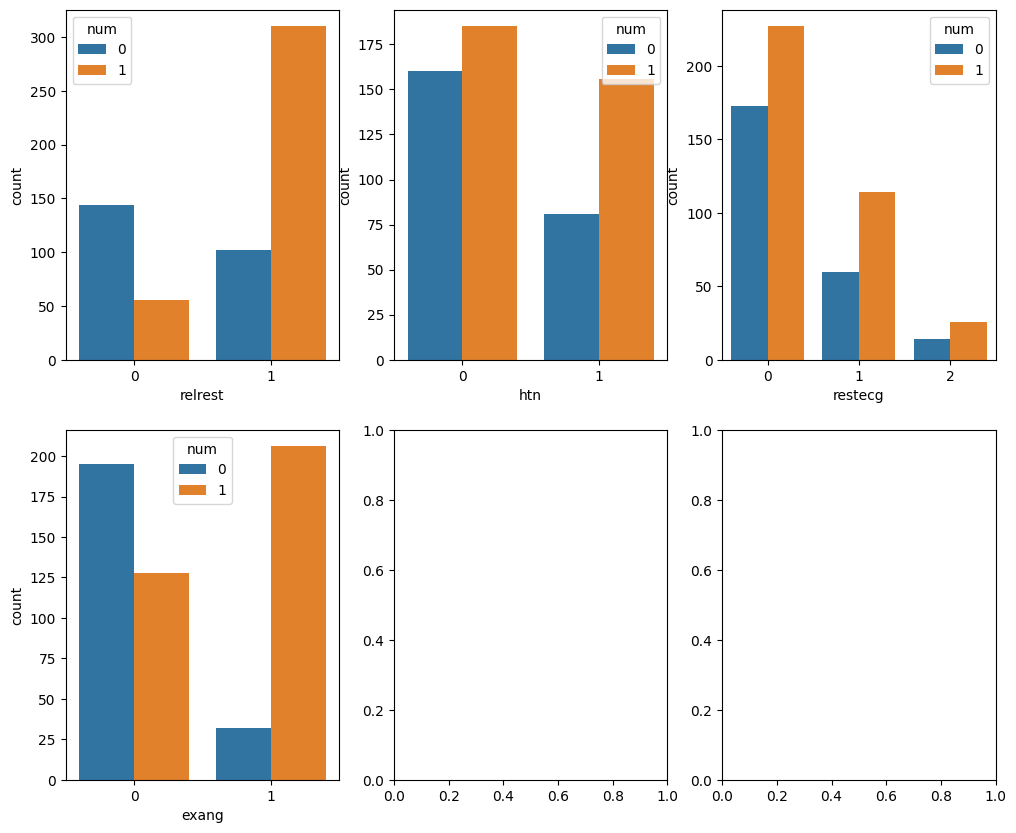

In [ ]:
fig, axes = plt.subplots(2,3,figsize=(12,10));

for i, c in enumerate(missing_cats):
    if c == "num":
      continue
    ax = axes.reshape(-1)[i]
    a = sns.countplot(x=c,data=df, ax=ax, hue='num');

- Exang és molt important.

In [ ]:
#df.drop("pro", axis=1, inplace=True)
df.dropna(subset=df.select_dtypes(include=['category']).columns, axis=0, inplace=True)
len(df)

524

In [ ]:
len(df)

524

In [ ]:
# one hot encoding excepte al target

cat_cols = df.select_dtypes(include=['category']).columns
cat_no_target = cat_cols.drop(['num'])
encoded_cat = pd.get_dummies(df[cat_no_target], columns = cat_no_target)

df = pd.concat([df, encoded_cat], axis=1)
df = df.drop(cat_no_target, axis=1)

df

print(df.dtypes)

age              int64
trestbps       float64
thaldur        float64
met            float64
thalach        float64
thalrest       float64
tpeakbps       float64
tpeakbpd       float64
trestbpd       float64
oldpeak        float64
rldv5          float64
num           category
diff_rldv5     float64
sex_0             bool
sex_1             bool
painloc_0         bool
painloc_1         bool
painexer_0        bool
painexer_1        bool
relrest_0         bool
relrest_1         bool
cp_1              bool
cp_2              bool
cp_3              bool
cp_4              bool
htn_0             bool
htn_1             bool
restecg_0         bool
restecg_1         bool
restecg_2         bool
exang_0           bool
exang_1           bool
dtype: object


## Train test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["num"]), df["num"], test_size=0.2, random_state=1234)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

X_train

(419, 31)
(419,)
(105, 31)
(105,)


,age,trestbps,thaldur,met,thalach,thalrest,tpeakbps,tpeakbpd,trestbpd,oldpeak,...,cp_2,cp_3,cp_4,htn_0,htn_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1
460,41,104.0,2.3,2.0,111.0,72.0,120.0,80.0,64.0,0.0,...,False,False,True,True,False,False,True,False,True,False
465,59,NaN,5.0,5.0,128.0,73.0,120.0,80.0,NaN,2.0,...,False,True,False,True,False,True,False,False,False,True
74,55,140.0,11.0,5.0,128.0,90.0,200.0,110.0,90.0,1.5,...,False,False,True,True,False,True,False,False,False,True
586,57,180.0,4.5,5.0,120.0,72.0,NaN,NaN,80.0,0.8,...,True,False,False,False,True,False,True,False,True,False
454,60,120.0,6.0,6.0,133.0,64.0,180.0,90.0,72.0,2.0,...,False,False,True,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,60,120.0,10.0,5.0,135.0,73.0,145.0,90.0,80.0,0.0,...,False,True,False,True,False,False,False,True,True,False
407,57,140.0,6.0,NaN,100.0,78.0,170.0,110.0,95.0,0.0,...,False,False,True,False,True,True,False,False,False,True
204,31,100.0,11.0,9.0,150.0,75.0,120.0,100.0,70.0,0.0,...,True,False,False,True,False,False,True,False,True,False
53,41,130.0,12.0,6.0,150.0,77.0,170.0,95.0,90.0,0.0,...,True,False,False,True,False,True,False,False,True,False


## Escalat de variables numèriques

In [ ]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[num_cols]), columns=df[num_cols].columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test[num_cols]), columns=df[num_cols].columns)


X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)


X_train = pd.concat([X_train_scaled, X_train[encoded_cat.columns]], axis=1)
X_test = pd.concat([X_test_scaled, X_test[encoded_cat.columns]], axis=1)


X_train

,age,trestbps,thaldur,met,thalach,thalrest,tpeakbps,tpeakbpd,trestbpd,oldpeak,...,cp_2,cp_3,cp_4,htn_0,htn_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1
0,0.276596,0.111111,0.056522,0.000000,0.392308,0.33,0.142857,0.285714,0.200000,0.285714,...,False,False,True,True,False,False,True,False,True,False
1,0.659574,NaN,0.173913,0.272727,0.523077,0.34,0.142857,0.285714,NaN,0.571429,...,False,True,False,True,False,True,False,False,False,True
2,0.574468,0.444444,0.434783,0.272727,0.523077,0.51,0.714286,0.714286,0.571429,0.500000,...,False,False,True,True,False,True,False,False,False,True
3,0.617021,0.814815,0.152174,0.272727,0.461538,0.33,NaN,NaN,0.428571,0.400000,...,True,False,False,False,True,False,True,False,True,False
4,0.680851,0.259259,0.217391,0.363636,0.561538,0.25,0.571429,0.428571,0.314286,0.571429,...,False,False,True,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,0.680851,0.259259,0.391304,0.272727,0.576923,0.34,0.321429,0.428571,0.428571,0.285714,...,False,True,False,True,False,False,False,True,True,False
415,0.617021,0.444444,0.217391,NaN,0.307692,0.39,0.500000,0.714286,0.642857,0.285714,...,False,False,True,False,True,True,False,False,False,True
416,0.063830,0.074074,0.434783,0.636364,0.692308,0.36,0.142857,0.571429,0.285714,0.285714,...,True,False,False,True,False,False,True,False,True,False
417,0.276596,0.351852,0.478261,0.363636,0.692308,0.38,0.500000,0.500000,0.571429,0.285714,...,True,False,False,True,False,True,False,False,True,False


## Imputació de valors

In [ ]:
imputer = KNNImputer()
X_train_scaled = imputer.fit_transform(X_train)
X_test_scaled = imputer.transform(X_test)

X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

X_train

,age,trestbps,thaldur,met,thalach,thalrest,tpeakbps,tpeakbpd,trestbpd,oldpeak,...,cp_2,cp_3,cp_4,htn_0,htn_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1
0,0.276596,0.111111,0.056522,0.000000,0.392308,0.33,0.142857,0.285714,0.200000,0.285714,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.659574,0.324074,0.173913,0.272727,0.523077,0.34,0.142857,0.285714,0.485714,0.571429,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.574468,0.444444,0.434783,0.272727,0.523077,0.51,0.714286,0.714286,0.571429,0.500000,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.617021,0.814815,0.152174,0.272727,0.461538,0.33,0.580000,0.428571,0.428571,0.400000,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.680851,0.259259,0.217391,0.363636,0.561538,0.25,0.571429,0.428571,0.314286,0.571429,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,0.680851,0.259259,0.391304,0.272727,0.576923,0.34,0.321429,0.428571,0.428571,0.285714,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
415,0.617021,0.444444,0.217391,0.218182,0.307692,0.39,0.500000,0.714286,0.642857,0.285714,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
416,0.063830,0.074074,0.434783,0.636364,0.692308,0.36,0.142857,0.571429,0.285714,0.285714,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
417,0.276596,0.351852,0.478261,0.363636,0.692308,0.38,0.500000,0.500000,0.571429,0.285714,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
X_train[encoded_cat.columns] = X_train[encoded_cat.columns].astype('bool')
X_test[encoded_cat.columns] = X_test[encoded_cat.columns].astype('bool')

X_train

,age,trestbps,thaldur,met,thalach,thalrest,tpeakbps,tpeakbpd,trestbpd,oldpeak,...,cp_2,cp_3,cp_4,htn_0,htn_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1
0,0.276596,0.111111,0.056522,0.000000,0.392308,0.33,0.142857,0.285714,0.200000,0.285714,...,False,False,True,True,False,False,True,False,True,False
1,0.659574,0.324074,0.173913,0.272727,0.523077,0.34,0.142857,0.285714,0.485714,0.571429,...,False,True,False,True,False,True,False,False,False,True
2,0.574468,0.444444,0.434783,0.272727,0.523077,0.51,0.714286,0.714286,0.571429,0.500000,...,False,False,True,True,False,True,False,False,False,True
3,0.617021,0.814815,0.152174,0.272727,0.461538,0.33,0.580000,0.428571,0.428571,0.400000,...,True,False,False,False,True,False,True,False,True,False
4,0.680851,0.259259,0.217391,0.363636,0.561538,0.25,0.571429,0.428571,0.314286,0.571429,...,False,False,True,True,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
414,0.680851,0.259259,0.391304,0.272727,0.576923,0.34,0.321429,0.428571,0.428571,0.285714,...,False,True,False,True,False,False,False,True,True,False
415,0.617021,0.444444,0.217391,0.218182,0.307692,0.39,0.500000,0.714286,0.642857,0.285714,...,False,False,True,False,True,True,False,False,False,True
416,0.063830,0.074074,0.434783,0.636364,0.692308,0.36,0.142857,0.571429,0.285714,0.285714,...,True,False,False,True,False,False,True,False,True,False
417,0.276596,0.351852,0.478261,0.363636,0.692308,0.38,0.500000,0.500000,0.571429,0.285714,...,True,False,False,True,False,True,False,False,True,False


In [ ]:
train_data = pd.concat([X_train, y_train], axis=1)
train_data.to_csv('train_data.csv', index=False)

test_data = pd.concat([X_test, y_test], axis=1)
test_data.to_csv('test_data.csv', index=False)

Complete attribute documentation:
      
      0 id: patient identification number
      1 ccf: social security number (I replaced this with a dummy value of 0)
      2 age: age in years
      3 sex: sex (1 = male; 0 = female)
      4 painloc: chest pain location (1 = substernal; 0 = otherwise)
      5 painexer (1 = provoked by exertion; 0 = otherwise)
      6 relrest (1 = relieved after rest; 0 = otherwise)
      7 pncaden (sum of 5, 6, and 7)
      8 cp: chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
     9 trestbps: resting blood pressure (in mm Hg on admission to the hospital)
     10 htn
     11 chol: serum cholestoral in mg/dl
     12 smoke: I believe this is 1 = yes; 0 = no (is or is not a smoker)
     13 cigs (cigarettes per day)
     14 years (number of years as a smoker)
     15 fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
     16 dm (1 = history of diabetes; 0 = no such history)
     17 famhist: family history of coronary artery disease (1 = yes; 0 = no)
     18 restecg: resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
     19 ekgmo (month of exercise ECG reading)
     20 ekgday(day of exercise ECG reading)
     21 ekgyr (year of exercise ECG reading)
     22 dig (digitalis used furing exercise ECG: 1 = yes; 0 = no)
     23 prop (Beta blocker used during exercise ECG: 1 = yes; 0 = no)
     24 nitr (nitrates used during exercise ECG: 1 = yes; 0 = no)
     25 pro (calcium channel blocker used during exercise ECG: 1 = yes; 0 = no)
     26 diuretic (diuretic used used during exercise ECG: 1 = yes; 0 = no)
     27 proto: exercise protocol
          1 = Bruce     
          2 = Kottus
          3 = McHenry
          4 = fast Balke
          5 = Balke
          6 = Noughton
          7 = bike 150 kpa min/min  (Not sure if "kpa min/min" is what was written!)
          8 = bike 125 kpa min/min  
          9 = bike 100 kpa min/min
         10 = bike 75 kpa min/min
         11 = bike 50 kpa min/min
         12 = arm ergometer
     28 thaldur: duration of exercise test in minutes
     29 thaltime: time when ST measure depression was noted
     30 met: mets achieved
     31 thalach: maximum heart rate achieved
     32 thalrest: resting heart rate
     33 tpeakbps: peak exercise blood pressure (first of 2 parts)
     34 tpeakbpd: peak exercise blood pressure (second of 2 parts)
     35 dummy
     36 trestbpd: resting blood pressure
     37 exang: exercise induced angina (1 = yes; 0 = no)
     38 xhypo: (1 = yes; 0 = no)
     39 oldpeak = ST depression induced by exercise relative to rest
     40 slope: the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping
     41 rldv5: height at rest
     42 rldv5e: height at peak exercise
     43 ca: number of major vessels (0-3) colored by flourosopy
     44 restckm: irrelevant
     45 exerckm: irrelevant
     46 restef: rest raidonuclid (sp?) ejection fraction
     47 restwm: rest wall (sp?) motion abnormality
        0 = none
        1 = mild or moderate
        2 = moderate or severe
        3 = akinesis or dyskmem (sp?)
     48 exeref: exercise radinalid (sp?) ejection fraction
     49 exerwm: exercise wall (sp?) motion
     50 thal: A blood disorder called thalassemia 3 = normal; 6 = fixed defect; 7 = reversable defect
     51 thalsev: not used
     52 thalpul: not used
     53 earlobe: not used
     54 cmo: month of cardiac cath (sp?)  (perhaps "call")
     55 cday: day of cardiac cath (sp?)
     56 cyr: year of cardiac cath (sp?)
     57 num: diagnosis of heart disease (angiographic disease status)
        -- Value 0: < 50% diameter narrowing
        -- Value 1: > 50% diameter narrowing
        (in any major vessel: attributes 59 through 68 are vessels)
     58 lmt
     59 ladprox
     60 laddist
     61 diag
     62 cxmain
     63 ramus
     64 om1
     65 om2
     66 rcaprox
     67 rcadist
     68 lvx1: not used
     69 lvx2: not used
     70 lvx3: not used
     71 lvx4: not used
     72 lvf: not used
     73 cathef: not used
     74 junk: not used
     75 name: last name of patient